# Getting MNIST to work:

- input shape (784, ) or (28, 28) but add special layer Flatten( ) to the network
- output shape (10, ) with dummy encoding / one-hot encoding
- Activation of the last layer: Softmax
- Loss function: categorical_crossentropy


- To Do: Metrics
- To Do: plot learning curve

### Rule of Thumb
1. Build a v. small network to check whether the shapes are right (no errors)
2. Build a slightly bigger network to see whether loss is going down 
3. Build a big network and observe the learning curve - estimate how many epochs you need etc. Do I need more training or less training time, do I need to try ELU because it's oscillating...
4. Optimise, repeat 3 (lots of trial and error!)

## Activation Functions

- Number of layers: if you add enough of both layers and neurons you can theoretically 
- Number of neurons
- Loss optimiser - sets the learning rate: RMSProp and Adam
- Initialiser - sets the weights: glorot_uniform default
- Epochs - Need as many as you need until you reach the bottom of the cliff
- Batch Size - make it as large as your computer can handle e.g. 200+
- Regularisation - deals with overfitting!
    1. Batch Normalisation
    2. Early Stopping
    3. Dropout

In [1]:
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras import backend as K 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [89]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [90]:
print(f'Shape of xtrain: {xtrain.shape}\nShape of ytrain: {ytrain.shape}\nShape of xtest: {xtest.shape}\nShape of ytest: {ytest.shape}')

Shape of xtrain: (60000, 28, 28)
Shape of ytrain: (60000,)
Shape of xtest: (10000, 28, 28)
Shape of ytest: (10000,)


In [91]:
xtrain = xtrain.reshape(60000, 784)

In [92]:
xtrain.shape

(60000, 784)

In [6]:
xtrain = xtrain[:10000]
ytrain = ytrain[:10000]

In [93]:
ytrain=to_categorical(ytrain, 10) 

In [94]:
ytrain.shape

(60000, 10)

In [98]:
K.clear_session()

In [99]:
model = Sequential([
    Dense(100, input_shape=(784,)),
    BatchNormalization(),
    Activation('elu'),
    Dense(50),
    BatchNormalization(),
    Activation('elu'),
    Dense(25),
    BatchNormalization(),
    Activation('elu'),
    Dense(10),
    BatchNormalization(),
    Activation('softmax'),
])

In [100]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
batch_normalization_2 (Batch (None, 50)                200       
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
__________

In [101]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['categorical_crossentropy', 'acc'])

In [102]:
hist = model.fit(xtrain, ytrain, epochs=100, batch_size=700, verbose=1) 

Epoch 1/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.7177 - categorical_crossentropy: 0.7177 - acc: 0.8757
Epoch 2/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.4459 - categorical_crossentropy: 0.4459 - acc: 0.9443
Epoch 3/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.3529 - categorical_crossentropy: 0.3529 - acc: 0.9581
Epoch 4/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.2890 - categorical_crossentropy: 0.2890 - acc: 0.9651
Epoch 5/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.2422 - categorical_crossentropy: 0.2422 - acc: 0.9697
Epoch 6/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.2035 - categorical_crossentropy: 0.2035 - acc: 0.9743
Epoch 7/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.1731 - categorical_crossentropy: 0.1731 - acc: 0.9772
Epoch 8/100
60000/60000 [=======================

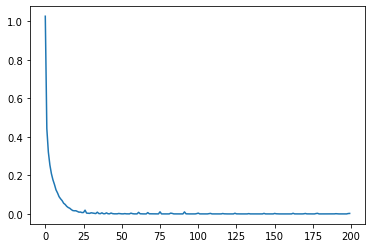

In [79]:
plt.plot(hist.history['loss'])

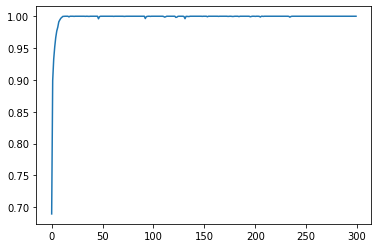

In [71]:
plt.plot(hist.history['acc'])

In [104]:
xtest.shape

(10000, 28, 28)

In [105]:
xtest = xtest.reshape(-1,784)

In [106]:
xtest.shape

(10000, 784)

In [107]:
ytest.shape

(10000,)

In [108]:
ytest = to_categorical(ytest, 10)

In [109]:
ytest.shape

(10000, 10)

In [110]:
model.evaluate(xtest, ytest)

10000/10000 [==============================] - 0s 39us/step


[0.09734475480981274, 0.09734475480981274, 0.9795]

In [111]:
K.clear_session()

In [112]:
model = Sequential([
    Dense(100, input_shape=(784,)),
    Dropout(0.5),
    BatchNormalization(),
    Activation('elu'),
    Dense(50),
    Dropout(0.5),
    BatchNormalization(),
    Activation('elu'),
    Dense(25),
    BatchNormalization(),
    Activation('elu'),
    Dense(10),
    BatchNormalization(),
    Activation('softmax'),
])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [113]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['categorical_crossentropy', 'acc'])

In [114]:
histdrop = model.fit(xtrain, ytrain, epochs=100, batch_size=700, verbose=1) 

Epoch 1/100
60000/60000 [==============================] - 2s 31us/step - loss: 1.1913 - categorical_crossentropy: 1.1913 - acc: 0.7032
Epoch 2/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.7974 - categorical_crossentropy: 0.7974 - acc: 0.8491
Epoch 3/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.6695 - categorical_crossentropy: 0.6695 - acc: 0.8758
Epoch 4/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.5894 - categorical_crossentropy: 0.5894 - acc: 0.8882
Epoch 5/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.5285 - categorical_crossentropy: 0.5285 - acc: 0.8971
Epoch 6/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.4795 - categorical_crossentropy: 0.4795 - acc: 0.9016
Epoch 7/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.4387 - categorical_crossentropy: 0.4387 - acc: 0.9066
Epoch 8/100
60000/60000 [=======================

In [115]:
model.evaluate(xtest, ytest)

10000/10000 [==============================] - 0s 43us/step


[0.14115509024981585, 0.14115509024981585, 0.965]

### After trying various combinations of hyperparameters for best train and test scores, the best scores obtained were with:
- Batch normalisation
- Dropout
- 'elu' activation
- softmax final layer
- rmsprop optimiser
- batch-size=700
- only 100 epochs required, if not less
